[[6.94794458e+00 2.48361861e+00 5.08130092e+00 ... 7.42592248e+00
  4.48434132e+00 5.77105690e+00]
 [2.43650802e+01 4.68970971e+00 1.30492266e+01 ... 3.37161109e+01
  1.31620770e+00 1.71191401e+01]
 [2.33110848e-10 3.23972945e-10 1.02271289e-09 ... 5.06907733e-10
  2.75244057e-12 6.25020841e-11]
 [6.09017515e+00 1.42206481e+01 3.32708573e+00 ... 1.94115228e+01
  7.76510719e+00 1.51589260e+01]
 [1.00000000e+02 1.00000000e+02 1.00000000e+02 ... 1.00000000e+02
  5.54097036e+01 1.00000000e+02]
 [5.03192735e-11 2.62501491e-11 3.18374453e-11 ... 3.72066145e-11
  3.00479417e-13 3.26879018e-11]]
overall
2.495915616740618
10.697067017307452
5.186119603495076e-10
21.81083886758924
76.81205328891296
3.608824178531141e-11


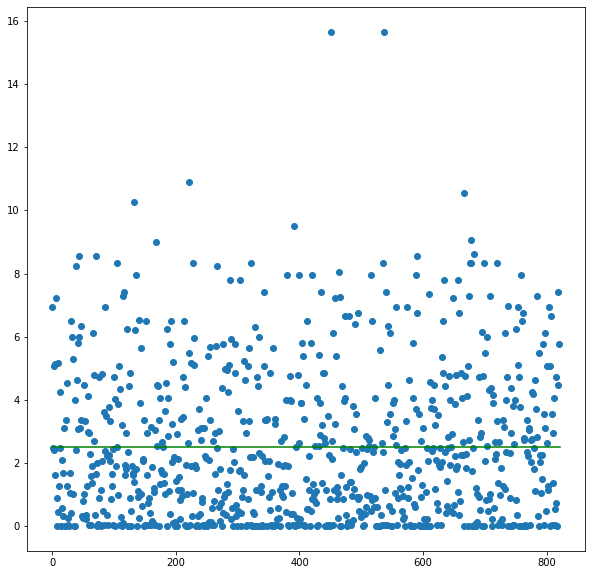

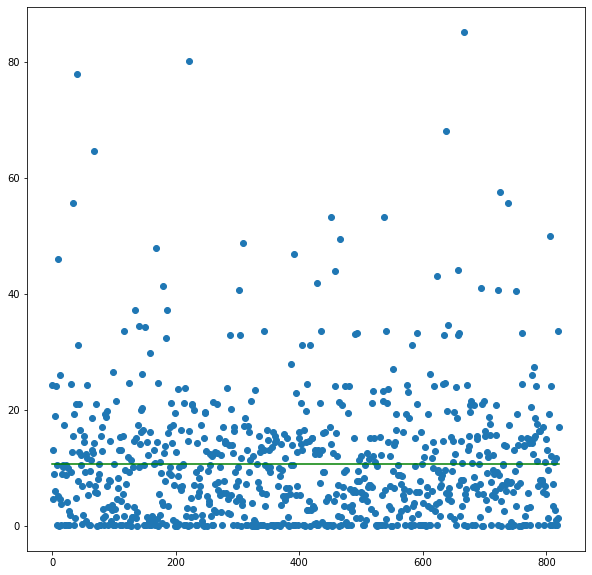

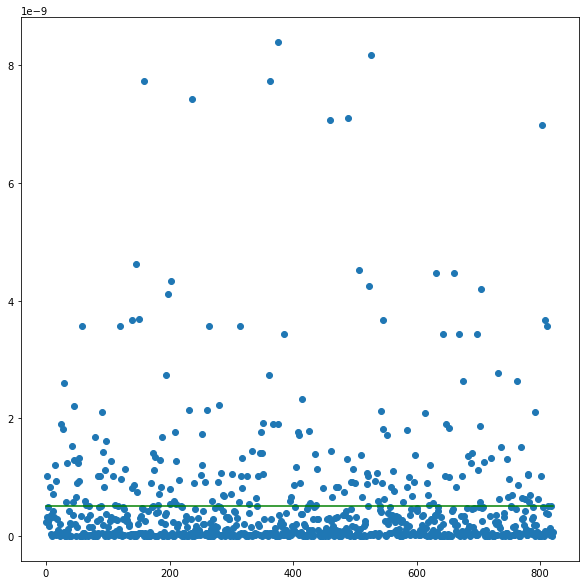

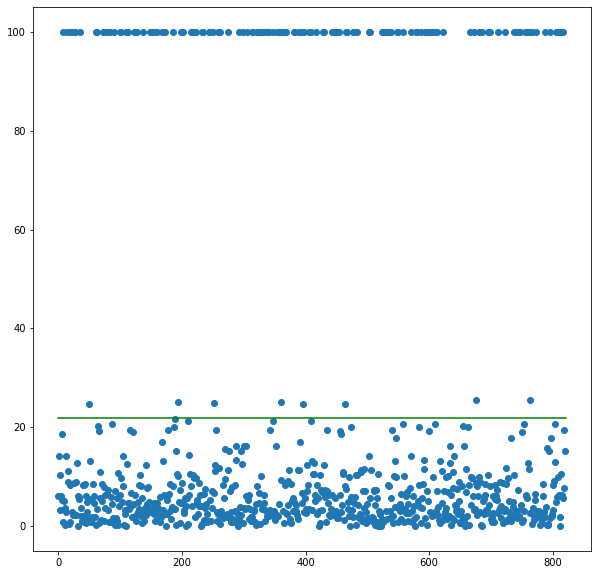

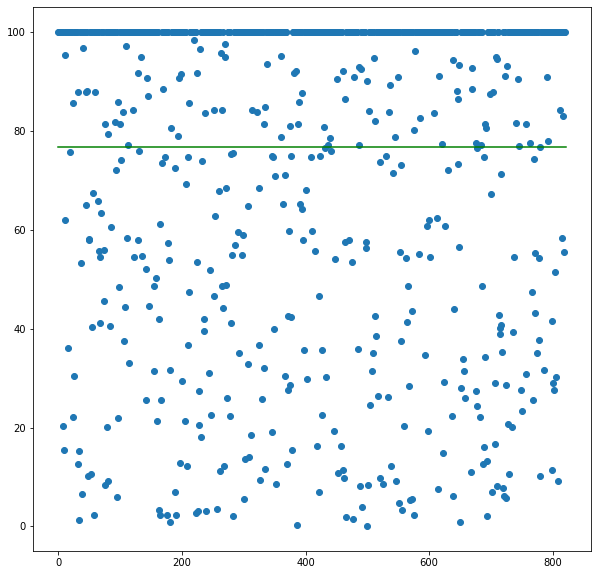

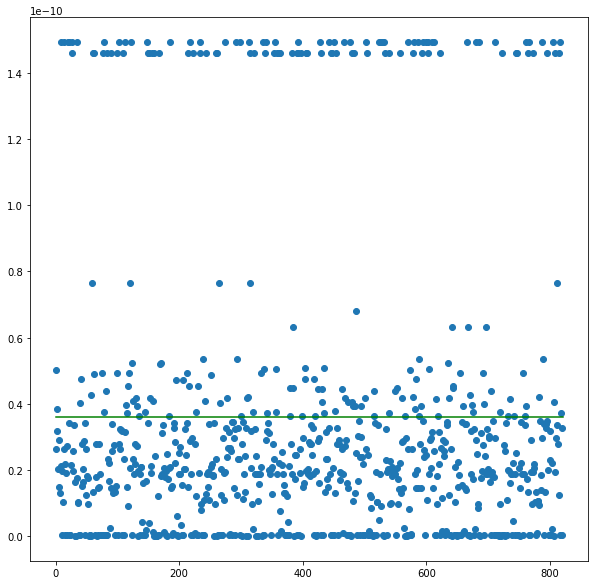

In [ ]:
# linear regression for multioutput regression
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import seaborn as sn
import matplotlib.pyplot as plt
import pandas
from sklearn.model_selection import train_test_split
import numpy as np



def drawCurve(x,y):
  plt.figure(figsize=(10,10))
   # for changing it to scatter plt.scatter() and keep the s which is point size
  plt.scatter(x,y)
  plt.plot([0,len(y)],[np.mean(y),np.mean(y)],color = 'g')
  #plt.savefig('coreUvsDrc.pdf', bbox_inches = 'tight')


dataframe = pandas.read_excel('/content/datasetOrginal.xlsx')


asr = dataframe['aspectratio'].tolist()
tArea = dataframe['totalarea'].tolist()
tWlen = dataframe['twirelen'].tolist()
cLkp = dataframe['clkperiod'].tolist()
drc = dataframe['drc'].tolist()
coreU = dataframe['coreutil'].tolist()


yOut = []
for i in range(len(asr)):
  yOut.append([coreU[i],asr[i],tArea[i],cLkp[i],drc[i],tWlen[i]])

df = dataframe.drop('aspectratio', axis=1)
df = df.drop('totalarea', axis=1)
df = df.drop('twirelen', axis=1)
df = df.drop('clkperiod', axis=1)
df = df.drop('drc', axis=1)
df = df.drop('coreutil', axis=1)

X = df.values
xTrain = []
xTest = []
yTrain = []
yTest = []



xTrain, xTest, yTrain, yTest = train_test_split(X, yOut, test_size=0.30, random_state=1)



model = LinearRegression()
# # fit model
model.fit(xTrain,yTrain)

yHat = model.predict(xTest)

errorArray = np.zeros([6,len(yHat)])

for i in range(6):
  sum1,sum2 = 0,0
  for j in range(len(yHat)):
    predOne = np.array(yHat).T[i][j]
    actualOne = np.array(yTest).T[i][j]
    
    if predOne == actualOne:
      errorArray[i][j] = 0
    
    else:
      sum1 = np.abs(np.abs(predOne)-actualOne)
      sum2 = (actualOne+ np.abs(predOne))
      sum = sum1/sum2
      errorArray[i][j] = sum*100

 
print(errorArray)
print('overall')
#print(np.mean(accuracy))
#[coreU[i],asr[i],tArea[i],cLkp[i],drc[i],tWlen[i]]
sampleNo = [i for i in range(len(yHat))]
for i in range(6):
  drawCurve(sampleNo,list(errorArray[i]))


for i in range(6):
  print(np.mean(list(errorArray[i])))


#Error percentage


# for i in range(len(yHat)):
#   output = ""
#   for j in range(6):
#     calculation = ((yHat[i][j]-yTest[i][j])/yTest[i][j])*100
#     output += str("{:.2f}".format(calculation))+"  "
  
#   print(output)






/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[[3.71758398e+00 4.66040090e+00 1.28405590e+00 ... 1.94821211e+00
  5.55516461e+01 3.62477518e+00]
 [2.57599392e+01 9.05265686e+00 1.65574298e+00 ... 7.97606868e+00
  9.33283022e+01 1.53636201e+01]
 [3.53735074e-03 1.54478963e-02 2.94131095e-03 ... 3.48051773e-02
  7.48046959e-02 3.15573324e-02]
 [1.59370891e+01 2.79908995e+01 6.41177385e+00 ... 6.81080302e+00
  9.62437956e+01 2.50346800e+01]
 [1.00000000e+02 1.00000000e+02 1.00000000e+02 ... 1.00000000e+02
  6.64959354e+01 1.00000000e+02]
 [2.67527714e-02 8.36288316e-03 3.52281592e-02 ... 2.70770619e-02
  1.61519202e-02 5.14055529e-03]]
overall
14.986833056596266
30.29460890038597
0.03300425819225846
45.514461488814405
69.02670498770607
0.018272827270523796


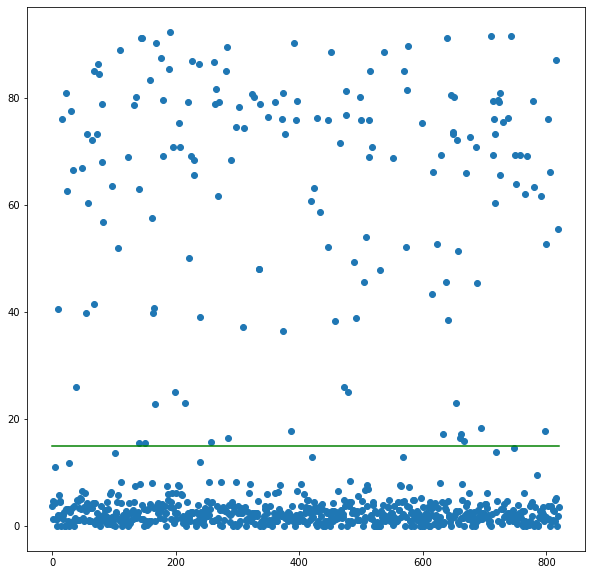

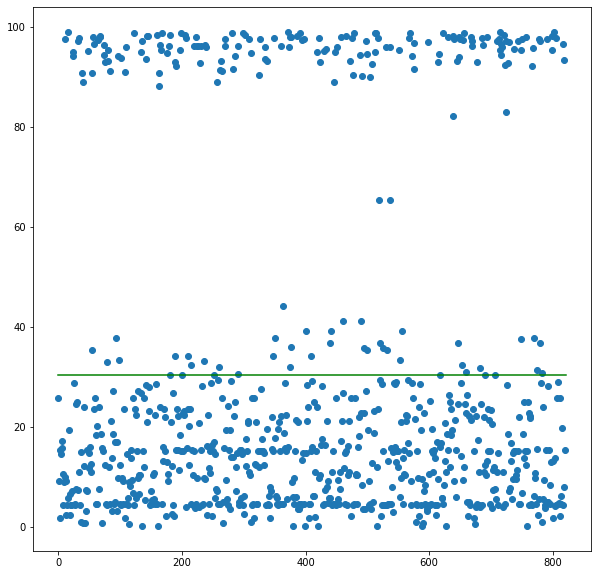

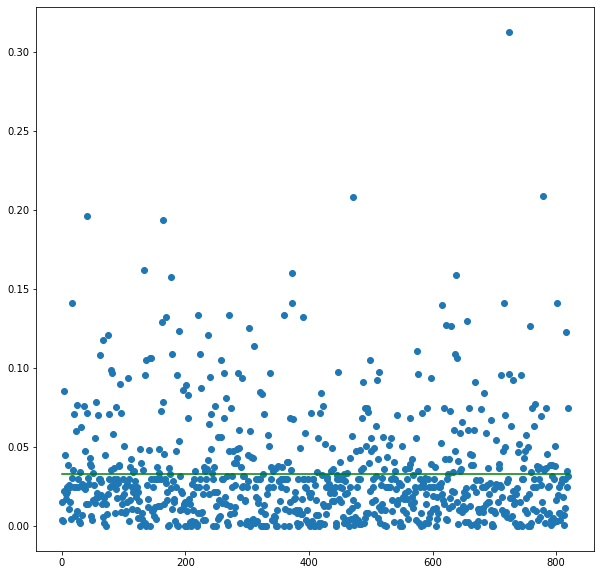

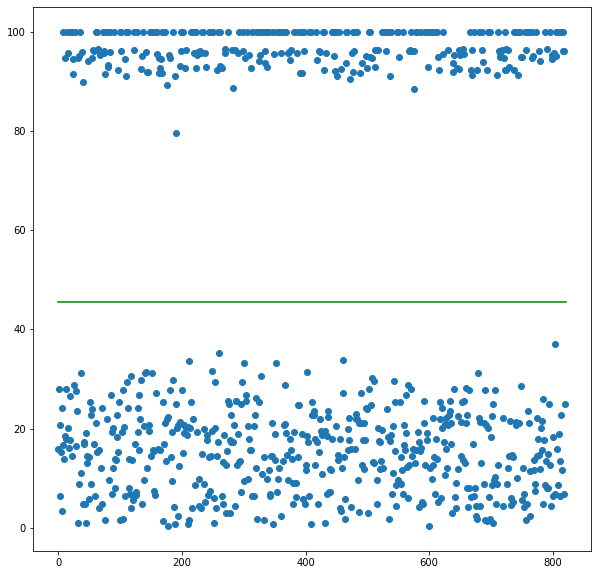

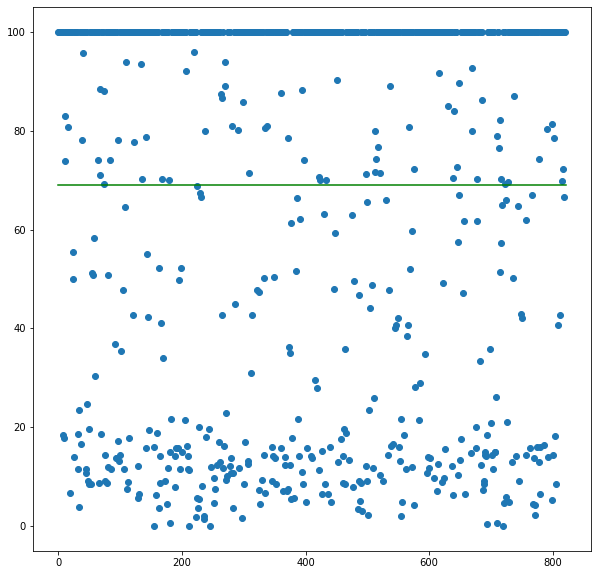

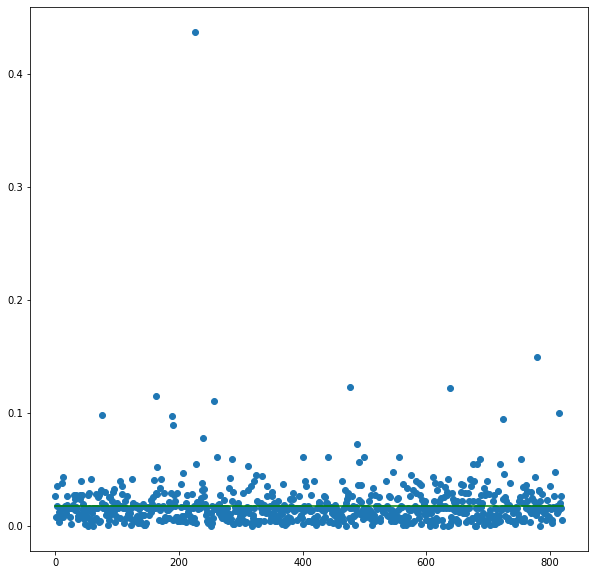

In [ ]:
# linear regression for  multioutput regression model
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import seaborn as sn
import matplotlib.pyplot as plt
import pandas
from sklearn.svm import LinearSVR
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR


def drawCurve(x,y):
  plt.figure(figsize=(10,10))
  plt.scatter(x,y)
  plt.plot([0,len(y)],[np.mean(y),np.mean(y)],color = 'g')
  #plt.plot(x,y,marker ='o') # for changing it to scatter plt.scatter() and keep the s which is point size
  
  #plt.savefig('coreUvsDrc.pdf', bbox_inches = 'tight')


dataframe = pandas.read_excel('/content/datasetOrginal.xlsx')


asr = dataframe['aspectratio'].tolist()
tArea = dataframe['totalarea'].tolist()
tWlen = dataframe['twirelen'].tolist()
cLkp = dataframe['clkperiod'].tolist()
drc = dataframe['drc'].tolist()
coreU = dataframe['coreutil'].tolist()


yOut = []
for i in range(len(asr)):
  yOut.append([coreU[i],asr[i],tArea[i],cLkp[i],drc[i],tWlen[i]])

df = dataframe.drop('aspectratio', axis=1)
df = df.drop('totalarea', axis=1)
df = df.drop('twirelen', axis=1)
df = df.drop('clkperiod', axis=1)
df = df.drop('drc', axis=1)
df = df.drop('coreutil', axis=1)

X = df.values
xTrain = []
xTest = []
yTrain = []
yTest = []

xTrain, xTest, yTrain, yTest = train_test_split(X, yOut, test_size=0.30, random_state=1)



model = LinearSVR()
wrapper = MultiOutputRegressor(model)
# # fit model
wrapper.fit(xTrain,yTrain)

yHat = wrapper.predict(xTest)


errorArray = np.zeros([6,len(yHat)])

for i in range(6):
  sum1,sum2 = 0,0
  for j in range(len(yHat)):
    predOne = np.array(yHat).T[i][j]
    actualOne = np.array(yTest).T[i][j]
    
    if predOne == actualOne:
      errorArray[i][j] = 0
    
    else:
      sum1 = np.abs(np.abs(predOne)-actualOne)
      sum2 = (actualOne+np.abs(predOne))
      sum = sum1/sum2
      errorArray[i][j] = sum*100

 
print(errorArray)
print('overall')
#print(np.mean(accuracy))
#[coreU[i],asr[i],tArea[i],cLkp[i],drc[i],tWlen[i]]
sampleNo = [i for i in range(len(yHat))]
for i in range(6):
  drawCurve(sampleNo,list(errorArray[i]))


for i in range(6):
  print(np.mean(list(errorArray[i])))


#Drawing curve
# for i in range(6):
#   drawCurve(list(plot_yTest[i]),list(plot_yHat[i]))

#Errror percwentage

# for i in range(len(yHat)):
#   output = ""
#   for j in range(6):
#     calculation = ((yHat[i][j]-yTest[i][j])/yTest[i][j])*100
#     output += str("{:.2f}".format(calculation))+"  "
  
#   print(output)






/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[[2.56606320e-01 9.13361271e-02 3.69287740e+00 ... 2.00028132e+00
  8.41309889e+01 1.49599928e+00]
 [2.84604264e-01 1.05864120e+00 7.14293211e+00 ... 6.49760712e+01
  5.40031828e+01 2.93305335e-01]
 [8.83133106e-02 1.03180257e-01 8.62434834e-02 ... 1.19384683e-01
  2.26532255e-01 1.21800594e-01]
 [6.00182499e+00 1.90405255e+01 2.10110646e+00 ... 1.98455984e+01
  8.55411871e+01 1.27966153e+01]
 [1.00000000e+02 1.00000000e+02 1.00000000e+02 ... 1.00000000e+02
  6.60341026e+01 1.00000000e+02]
 [5.34623413e-03 1.97312089e-02 6.20259310e-03 ... 1.40577627e-02
  4.80219292e-02 2.98481631e-02]]
overall
18.375838598557504
22.68034376017304
0.11765835603929319
34.760383985321944
69.43736391942588
0.04012838904465749


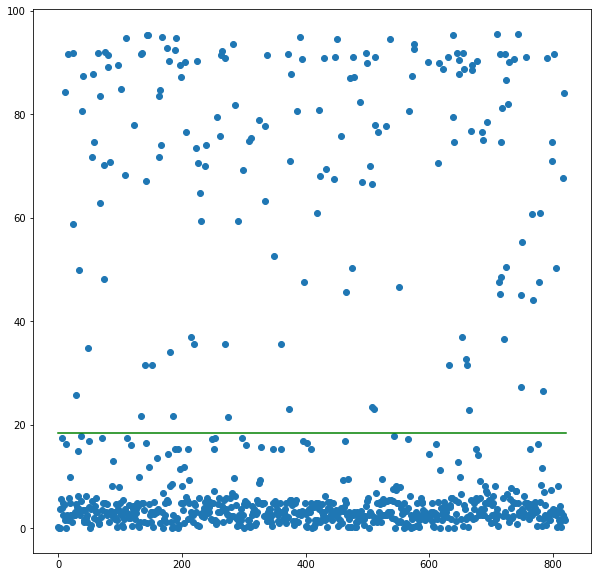

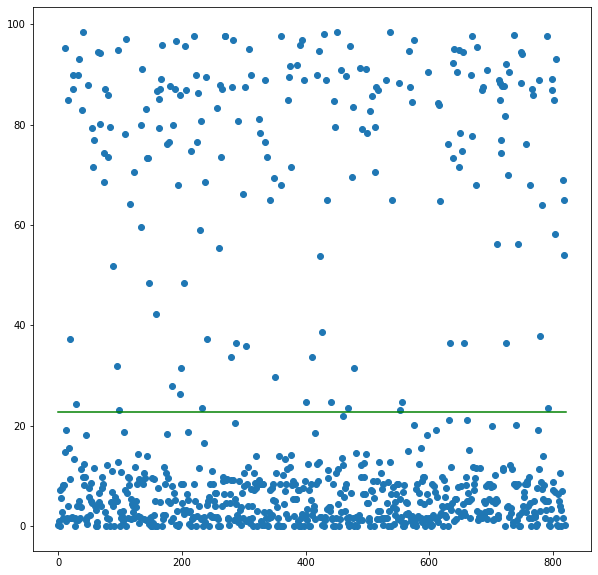

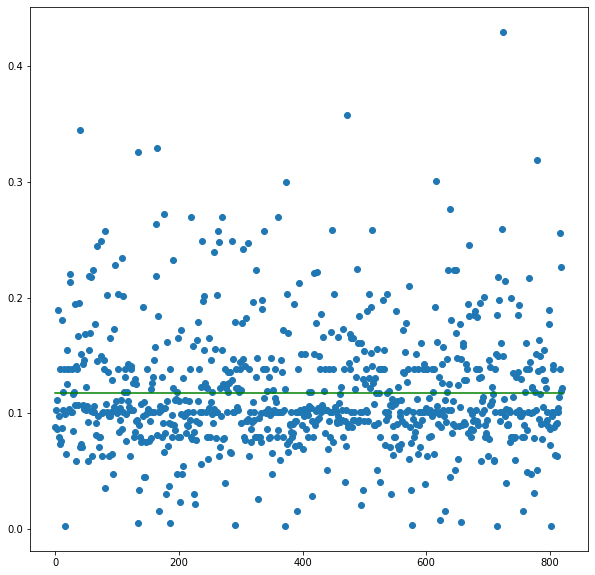

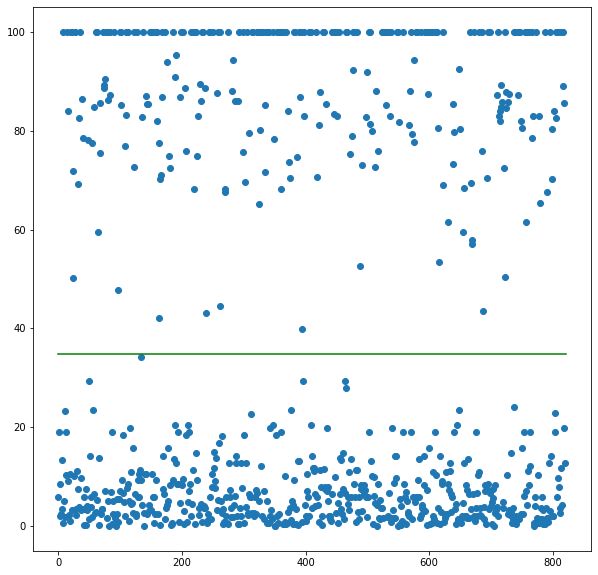

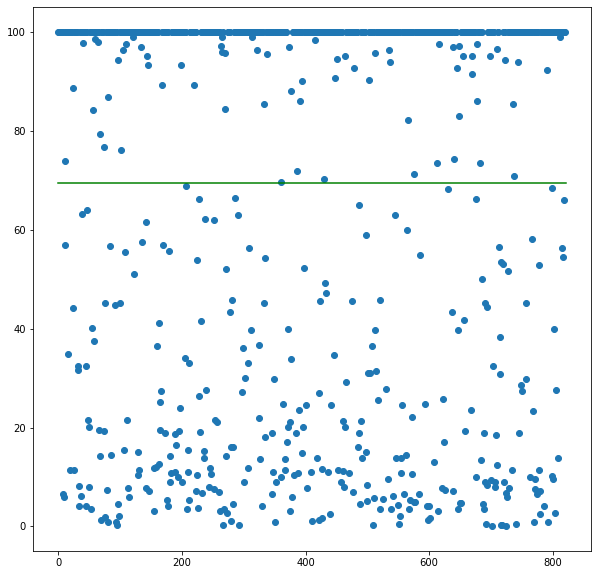

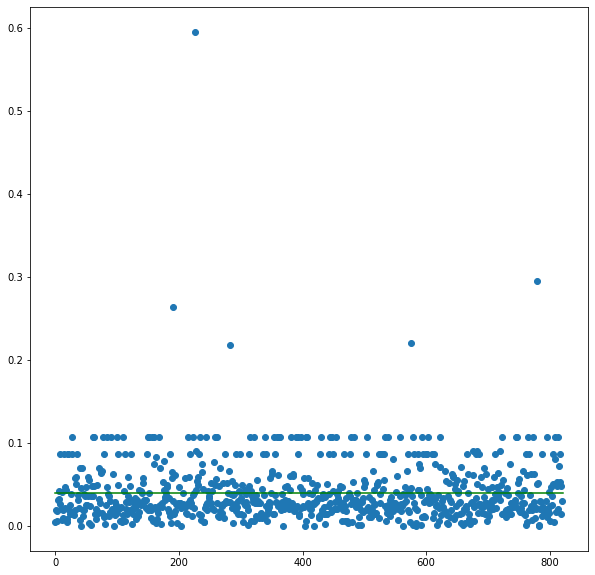

In [ ]:
#chained multioutput regression model

from sklearn.multioutput import RegressorChain
from sklearn.svm import LinearSVR


# linear regression for multioutput regression
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import seaborn as sn
import matplotlib.pyplot as plt
import pandas
from sklearn.svm import LinearSVR
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR


def drawCurve(x,y):
  plt.figure(figsize=(10,10))
  plt.scatter(x,y)
  plt.plot([0,len(y)],[np.mean(y),np.mean(y)],color = 'g')
  #plt.plot(x,y,marker ='o') # for changing it to scatter plt.scatter() and keep the s which is point size
  
  #plt.savefig('coreUvsDrc.pdf', bbox_inches = 'tight')


dataframe = pandas.read_excel('/content/datasetOrginal.xlsx')


asr = dataframe['aspectratio'].tolist()
tArea = dataframe['totalarea'].tolist()
tWlen = dataframe['twirelen'].tolist()
cLkp = dataframe['clkperiod'].tolist()
drc = dataframe['drc'].tolist()
coreU = dataframe['coreutil'].tolist()


yOut = []
for i in range(len(asr)):
  yOut.append([coreU[i],asr[i],tArea[i],cLkp[i],drc[i],tWlen[i]])

df = dataframe.drop('aspectratio', axis=1)
df = df.drop('totalarea', axis=1)
df = df.drop('twirelen', axis=1)
df = df.drop('clkperiod', axis=1)
df = df.drop('drc', axis=1)
df = df.drop('coreutil', axis=1)

X = df.values
xTrain = []
xTest = []
yTrain = []
yTest = []

xTrain, xTest, yTrain, yTest = train_test_split(X, yOut, test_size=0.30, random_state=1)



model = LinearSVR()
wrapper = RegressorChain(model)
# # fit model
wrapper.fit(xTrain,yTrain)

yHat = wrapper.predict(xTest)


errorArray = np.zeros([6,len(yHat)])

for i in range(6):
  sum1,sum2 = 0,0
  for j in range(len(yHat)):
    predOne = np.array(yHat).T[i][j]
    actualOne = np.array(yTest).T[i][j]
    
    if predOne == actualOne:
      errorArray[i][j] = 0
    
    else:
      sum1 = np.abs(np.abs(predOne)-actualOne)
      sum2 = (actualOne+ np.abs(predOne))
      sum = sum1/sum2
      errorArray[i][j] = sum*100

 
print(errorArray)
print('overall')
#print(np.mean(accuracy))
#[coreU[i],asr[i],tArea[i],cLkp[i],drc[i],tWlen[i]]
sampleNo = [i for i in range(len(yHat))]
for i in range(6):
  drawCurve(sampleNo,list(errorArray[i]))


for i in range(6):
  print(np.mean(list(errorArray[i])))


#Error percentage

# for i in range(len(yHat)):
#   output = ""
#   for j in range(6):
#     calculation = ((yHat[i][j]-yTest[i][j])/yTest[i][j])*100
#     output += str("{:.2f}".format(calculation))+"  "
  
#   print(output)






[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.62423011e-15 ... 0.00000000e+00
  5.00275151e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.10002913e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.20943953e+01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.58055139e-01 0.00000000e+00]]
overall
0.36927017729365635
2.9258763347049057
0.14991013906894926
0.5367359914124851
14.392319725862098
0.2693962621541219


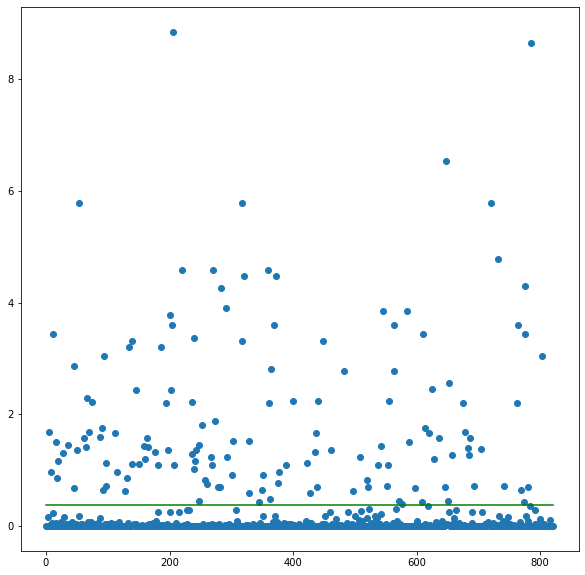

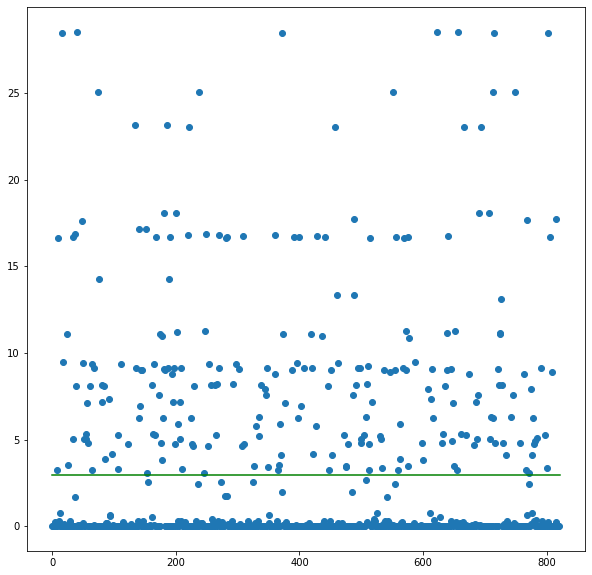

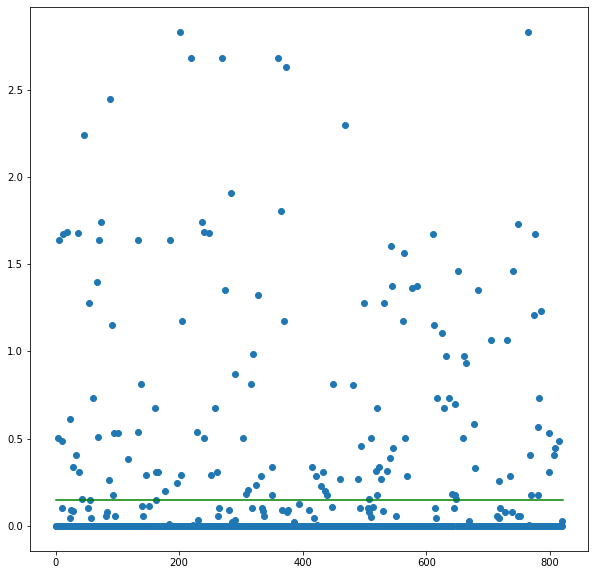

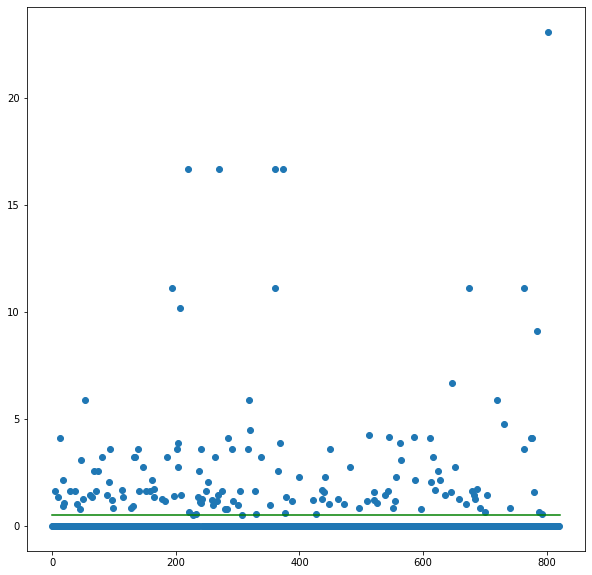

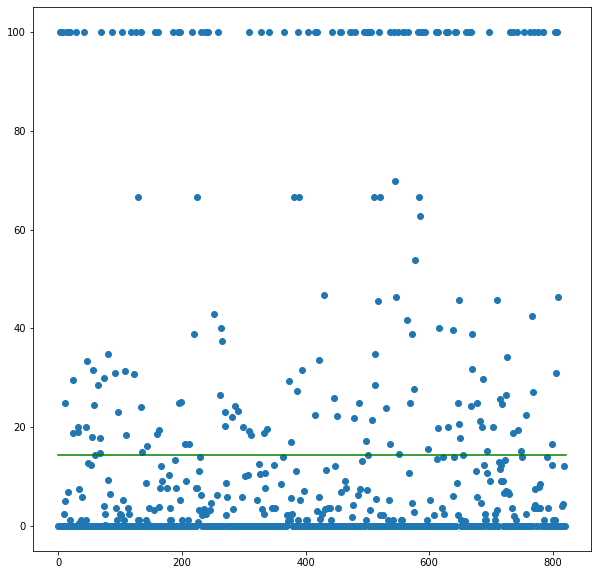

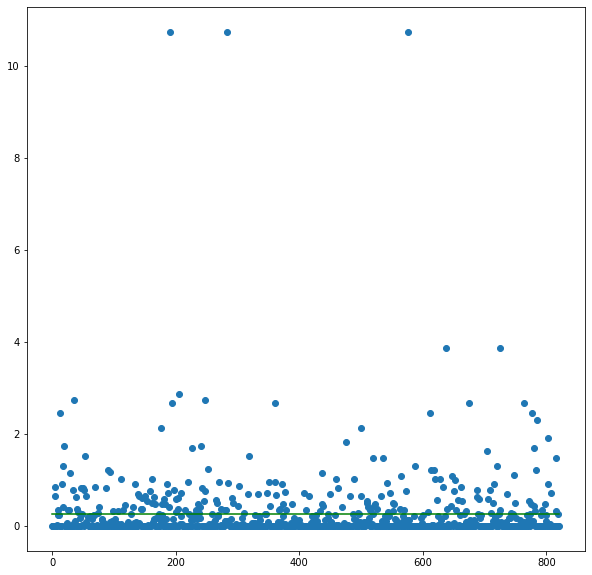

In [ ]:
#knearest neighbour
from sklearn.neighbors import KNeighborsRegressor
# linear regression for multioutput regression
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import seaborn as sn
import matplotlib.pyplot as plt
import pandas
from sklearn.svm import LinearSVR
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor



def drawCurve(x,y):
  plt.figure(figsize=(10,10))
  plt.scatter(x,y) 
  plt.plot([0,len(y)],[np.mean(y),np.mean(y)],color = 'g')
  #plt.plot(x,y,marker ='o') # for changing it to scatter plt.scatter() and keep the s which is point size
  
  #plt.savefig('coreUvsDrc.pdf', bbox_inches = 'tight')


dataframe = pandas.read_excel('/content/datasetOrginal.xlsx')


asr = dataframe['aspectratio'].tolist()
tArea = dataframe['totalarea'].tolist()
tWlen = dataframe['twirelen'].tolist()
cLkp = dataframe['clkperiod'].tolist()
drc = dataframe['drc'].tolist()
coreU = dataframe['coreutil'].tolist()


yOut = []
for i in range(len(asr)):
  yOut.append([coreU[i],asr[i],tArea[i],cLkp[i],drc[i],tWlen[i]])

df = dataframe.drop('aspectratio', axis=1)
df = df.drop('totalarea', axis=1)
df = df.drop('twirelen', axis=1)
df = df.drop('clkperiod', axis=1)
df = df.drop('drc', axis=1)
df = df.drop('coreutil', axis=1)

X = df.values
xTrain = []
xTest = []
yTrain = []
yTest = []

xTrain, xTest, yTrain, yTest = train_test_split(X, yOut, test_size=0.30, random_state=1)



model = KNeighborsRegressor()
model.fit(xTrain,yTrain)

yHat = model.predict(xTest)


errorArray = np.zeros([6,len(yHat)])

for i in range(6):
  sum1,sum2 = 0,0
  for j in range(len(yHat)):
    predOne = np.array(yHat).T[i][j]
    actualOne = np.array(yTest).T[i][j]
    
    if predOne == actualOne:
      errorArray[i][j] = 0
    
    else:
      sum1 = np.abs(np.abs(predOne)-actualOne)
      sum2 = (actualOne+ np.abs(predOne))
      sum = sum1/sum2
      errorArray[i][j] = sum*100

 
print(errorArray)
print('overall')
#print(np.mean(accuracy))
#[coreU[i],asr[i],tArea[i],cLkp[i],drc[i],tWlen[i]]
sampleNo = [i for i in range(len(yHat))]
for i in range(6):
  drawCurve(sampleNo,list(errorArray[i]))


for i in range(6):
  print(np.mean(list(errorArray[i])))


#print(np.abs(plot_yHat-plot_yTest)/plot_yTest)


#Drawing six curve
# for i in range(6):
#   drawCurve(list(plot_yTest[i]),list(plot_yHat[i]))


#Error percentage

# for i in range(len(yHat)):
#   output = ""
#   for j in range(6):
#     calculation = ((yHat[i][j]-yTest[i][j])/yTest[i][j])*100
#     output += str("{:.2f}".format(calculation))+"  "
  
#   print(output)






[[0.00000000e+00 9.87742904e-15 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.62423011e-15 ... 5.72279910e-15
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.84327908e-15
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.25806452e+01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
overall
0.07791237476037229
0.7164358240871342
0.045245023790620814
1.2076546961180294
10.741730748725118
0.028675899560162785


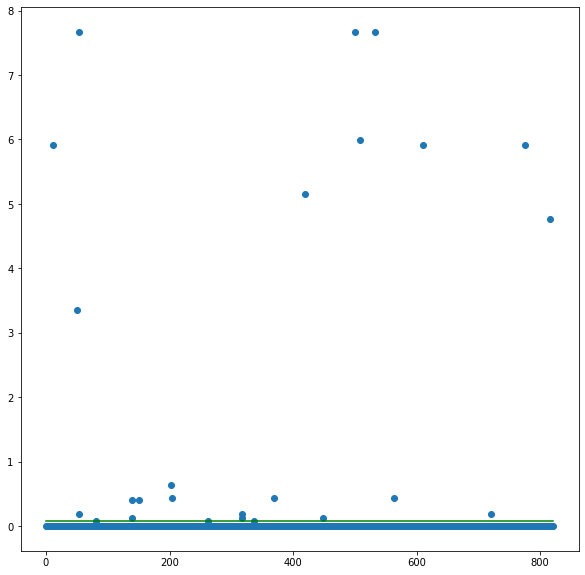

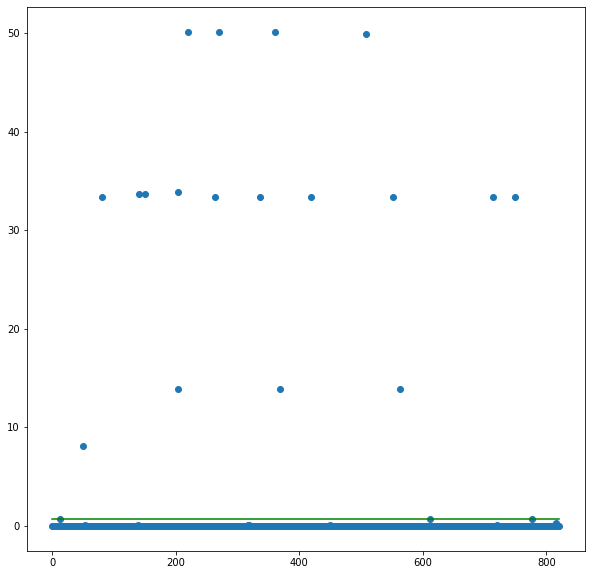

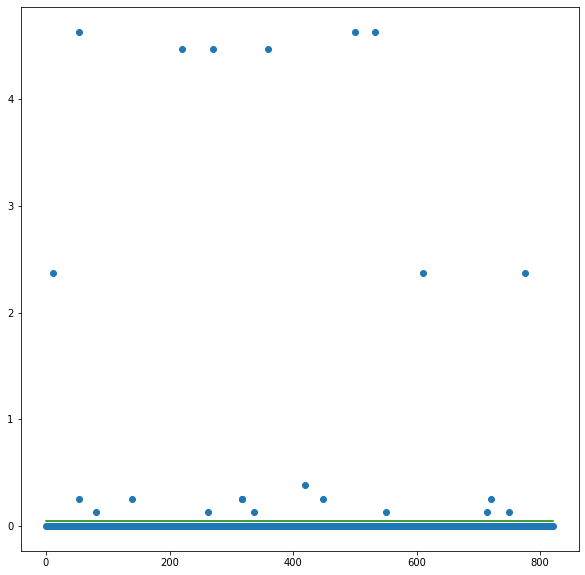

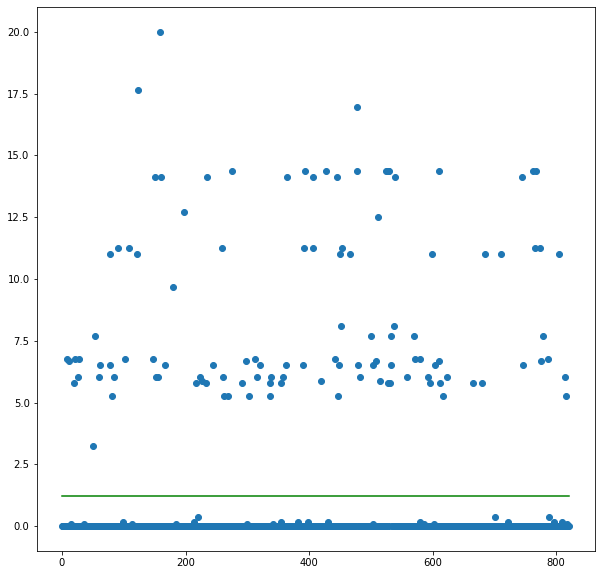

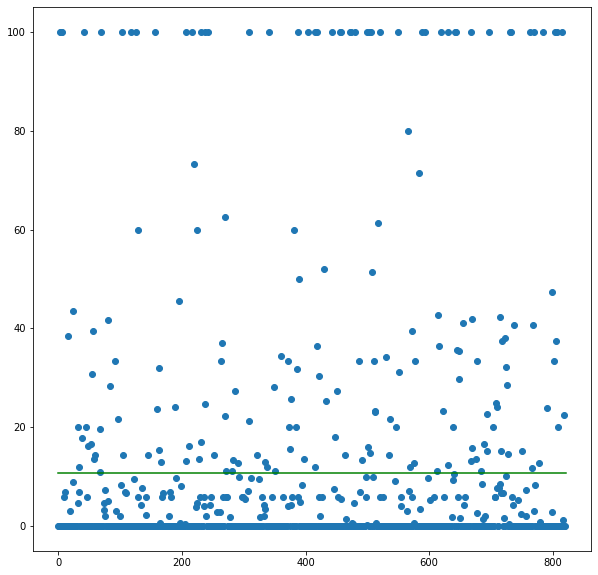

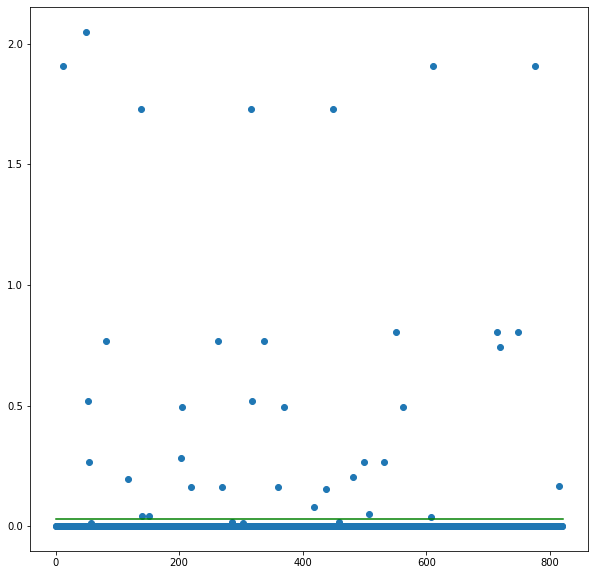

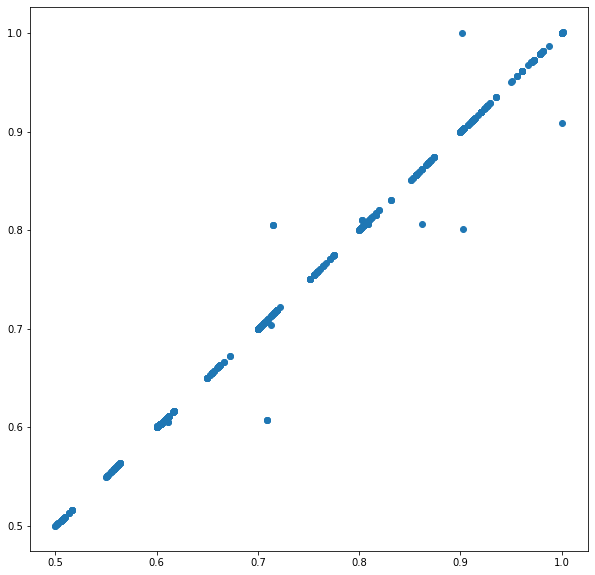

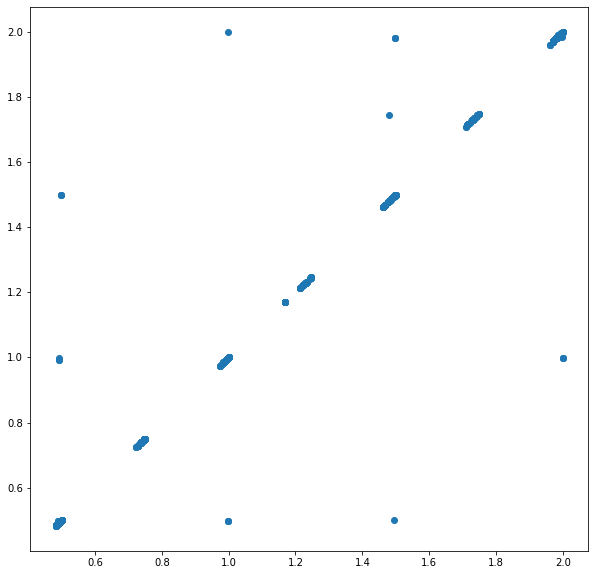

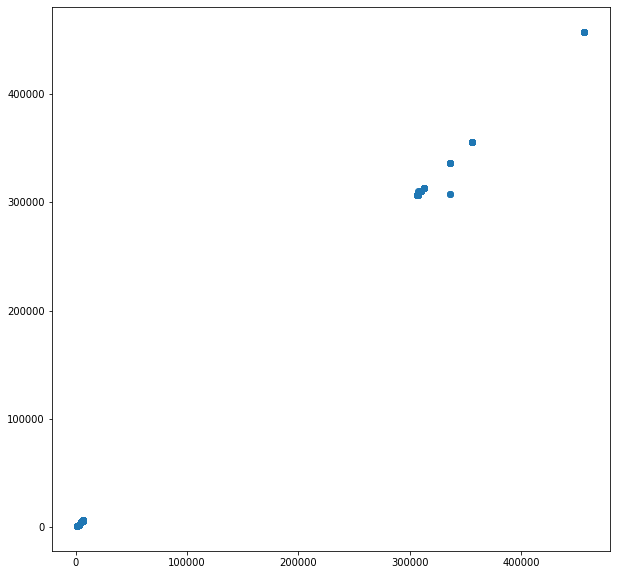

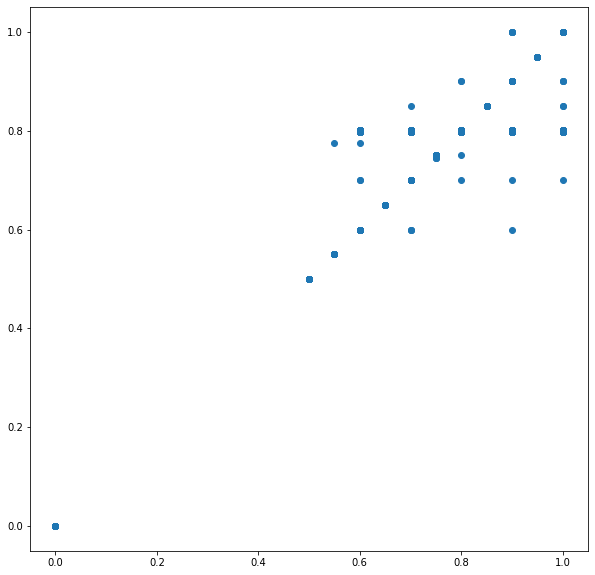

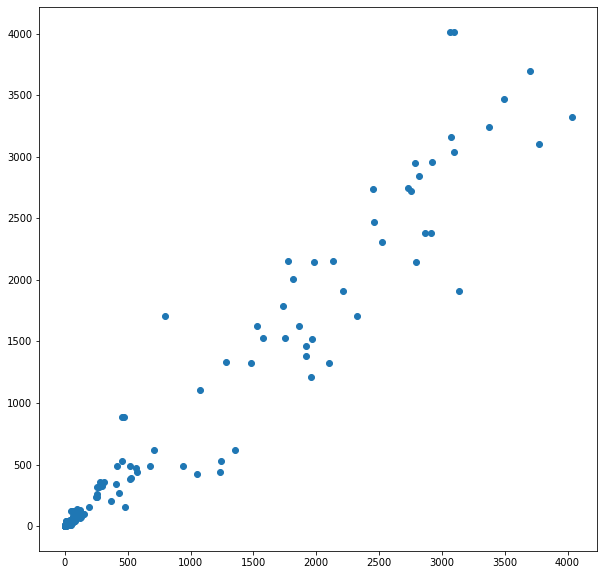

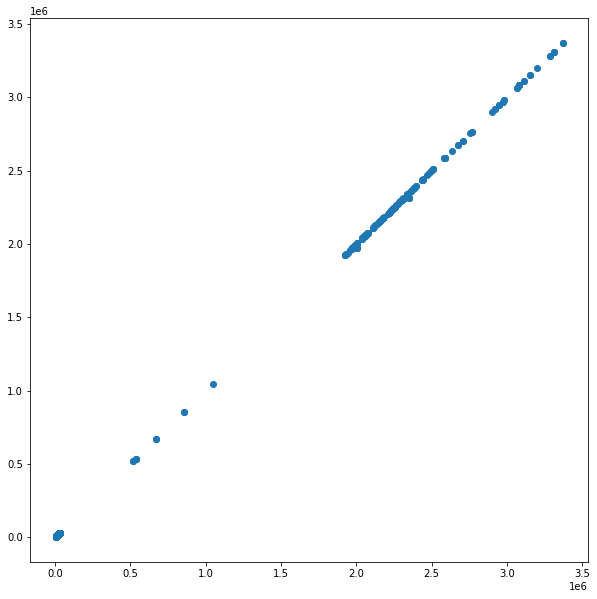

In [4]:
#Decision tree regressor
from sklearn.neighbors import KNeighborsRegressor
# linear regression for multioutput regression
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import seaborn as sn
import matplotlib.pyplot as plt
import pandas
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xlwt 
from xlwt import Workbook 

wb = Workbook() 


def drawCurve(x,y):
  plt.figure(figsize=(10,10))
  plt.scatter(x,y) 
  plt.plot([0,len(y)],[np.mean(y),np.mean(y)],color = 'g')
  #plt.plot(x,y,marker ='o') # for changing it to scatter plt.scatter() and keep the s which is point size
  
  #plt.savefig('coreUvsDrc.pdf', bbox_inches = 'tight')


def drawRocCurve(x,y):
  plt.figure(figsize=(10,10))
  plt.scatter(x,y) 

dataframe = pandas.read_excel('/content/datasetOrginal1.xlsx')


asr = dataframe['aspectratio'].tolist()
tArea = dataframe['totalarea'].tolist()
tWlen = dataframe['twirelen'].tolist()
cLkp = dataframe['clkperiod'].tolist()
drc = dataframe['drc'].tolist()
coreU = dataframe['coreutil'].tolist()


yOut = []
for i in range(len(asr)):
  yOut.append([coreU[i],asr[i],tArea[i],cLkp[i],drc[i],tWlen[i]])

df = dataframe.drop('aspectratio', axis=1)
df = df.drop('totalarea', axis=1)
df = df.drop('twirelen', axis=1)
df = df.drop('clkperiod', axis=1)
df = df.drop('drc', axis=1)
df = df.drop('coreutil', axis=1)

X = df.values
xTrain = []
xTest = []
yTrain = []
yTest = []

xTrain, xTest, yTrain, yTest = train_test_split(X, yOut, test_size=0.30, random_state=1)



model = DecisionTreeRegressor()
model.fit(xTrain,yTrain)

yHat = model.predict(xTest)

errorArray = np.zeros([6,len(yHat)])
sheet1 = wb.add_sheet('PredOne') 
sheet2 = wb.add_sheet('ActualOne')

#print(len(yHat))
for i in range(6):
  sum1,sum2 = 0,0
  c = 0
  for j in range(0,len(yHat)):
    predOne = np.array(yHat).T[i][j]
    actualOne = np.array(yTest).T[i][j]

    #print(str(predOne)+"------>"+str(actualOne))

    #print(predOne)

    sheet1.write(j,i,str(predOne))
    sheet2.write(j,i,str(actualOne))
   

    if predOne == actualOne:
      errorArray[i][j] = 0
    
    else:
      sum1 = np.abs(np.abs(predOne)-actualOne)
      sum2 = (actualOne+ np.abs(predOne))
      sum = sum1/sum2
      errorArray[i][j] = sum*100
  
  
  

wb.save('output.xls') 
print(errorArray)
print('overall')
#print(np.mean(accuracy))
#[coreU[i],asr[i],tArea[i],cLkp[i],drc[i],tWlen[i]]
sampleNo = [i for i in range(len(yHat))]
for i in range(6):
  drawCurve(sampleNo,list(errorArray[i]))


for i in range(6):
  print(np.mean(list(errorArray[i])))


plot_yHat = yHat.T
plot_yTest = np.array(yTest).T

for i in range(6):
  drawRocCurve(plot_yTest[i],plot_yHat[i])

#Error percentage

# for i in range(len(yHat)):
#   output = ""
#   for j in range(6):
#     calculation = ((yHat[i][j]-yTest[i][j])/yTest[i][j])*100
#     output += str("{:.2f}".format(calculation))+"  "
  
#   print(output)




# overall
# 0.034022236518643605
# 0.6000635542621284
# 0.03532472871419937
# 0.06418293423155867
# 10.861262902897671
# 0.029047691307093636

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

[ 0.00000000e+00  1.06053815e-05  8.83465337e-06  0.00000000e+00
  1.15686192e-04  0.00000000e+00  4.66996131e-05  0.00000000e+00
  9.38230063e-06  3.97525646e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.01297239e-04  0.00000000e+00  1.00119326e-05
 -5.07475929e-06  0.00000000e+00  1.98654767e-03  0.00000000e+00
  1.00523880e-05  4.06676804e-05  1.11749865e+00  0.00000000e+00
  1.06648381e-05  0.00000000e+00  9.71691311e-03  1.01412022e-02
  0.00000000e+00  1.04340666e-04  5.92768162e-04  8.82634491e-03
  0.00000000e+00  9.30926919e-05 -4.88268790e-06  0.00000000e+00
  5.92695288e-04  4.79598600e-03  8.44511674e-06  8.80083854e-06
  8.74510254e-05  0.00000000e+00  4.33060283e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.65872440e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

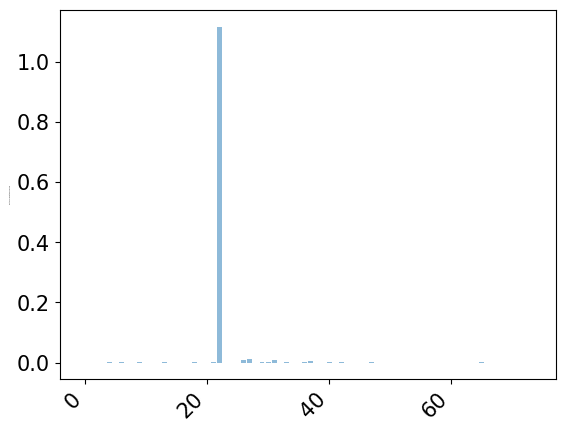

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression




#X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33)

model = RandomForestRegressor(max_depth=2, random_state=0)
model.fit(xTrain,yTrain)


imps = permutation_importance(model, xTest, yTest)
print(imps.importances_mean)

an = [i for i in range(74)]
print(an)
plt.bar(an,np.array(imps.importances_mean), width = .8, align='center', alpha=0.5)
plt.xticks(rotation=45, ha ='right', fontsize = 1)
plt.ylabel('Features importance mean', fontsize = 1)
plt.tick_params(labelsize=15)
plt.savefig('feature_importance.PNG', bbox_inches = "tight")
# plt.savefig('feature_importance.svg', bbox_inches = "tight")
# plt.savefig('feature_importance.pdf', bbox_inches = "tight")

[[7.72262047e-01 2.17077058e-01 1.08543229e+00 ... 1.62795671e+00
  4.13409463e-01 1.98448756e-02]
 [7.69030277e-01 7.03595955e-02 7.39476731e-01 ... 2.11313091e+00
  1.05797166e-01 2.24859449e+00]
 [3.86205969e-02 3.86205969e-02 3.86205969e-02 ... 3.86205969e-02
  8.55815256e-04 3.86205969e-02]
 [1.68287563e+00 4.45369092e+00 2.86619862e+00 ... 2.25466915e+00
  2.13166528e+00 3.63064893e+00]
 [1.00000000e+02 1.00000000e+02 1.00000000e+02 ... 1.00000000e+02
  9.20518380e+00 1.00000000e+02]
 [1.42833155e+00 3.96308700e-01 1.04199794e+00 ... 1.04917442e-01
  3.38711534e-02 1.15798311e+00]]
overall
0.5278414458415136
1.1124409534131523
0.029597035547529384
18.145877031888226
62.50645424794042
1.652673682938972


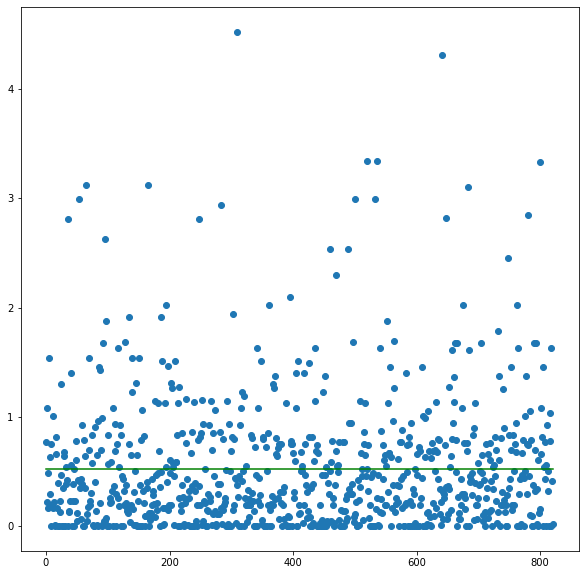

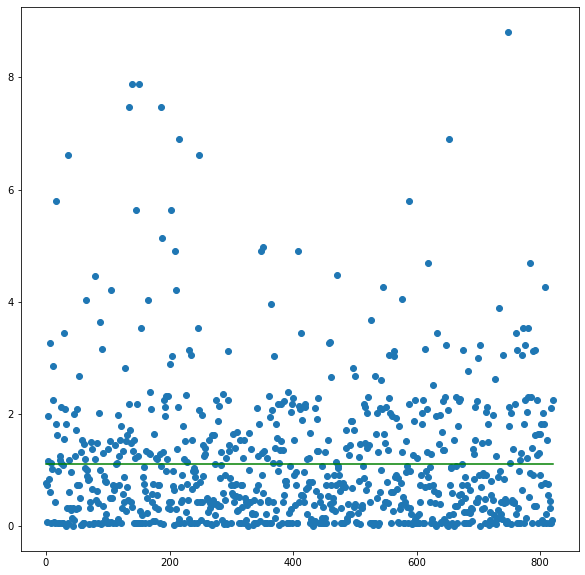

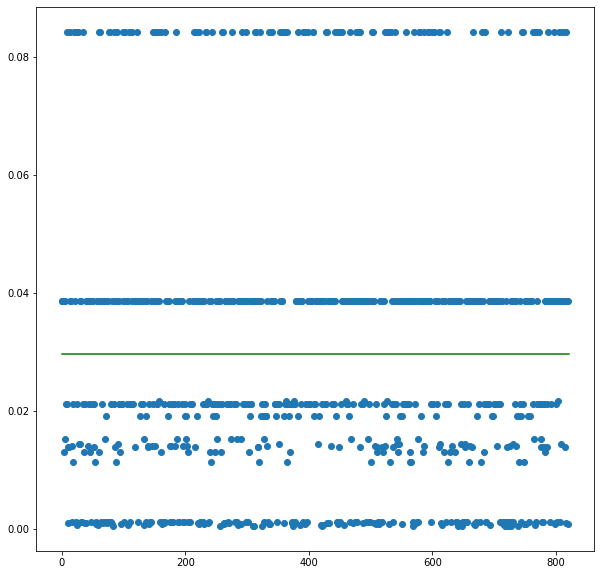

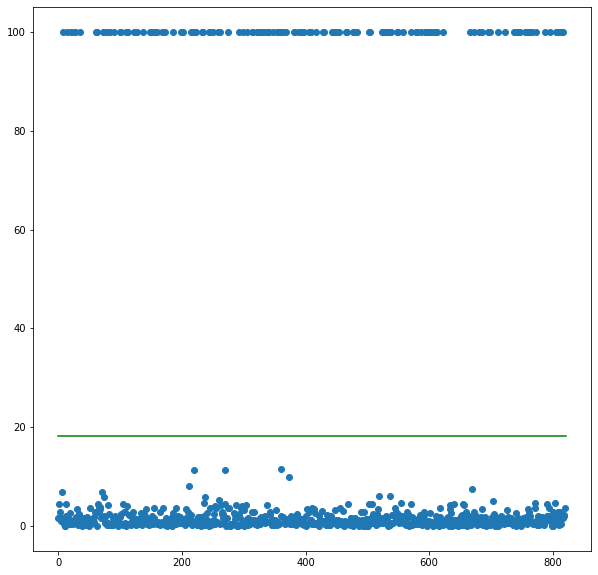

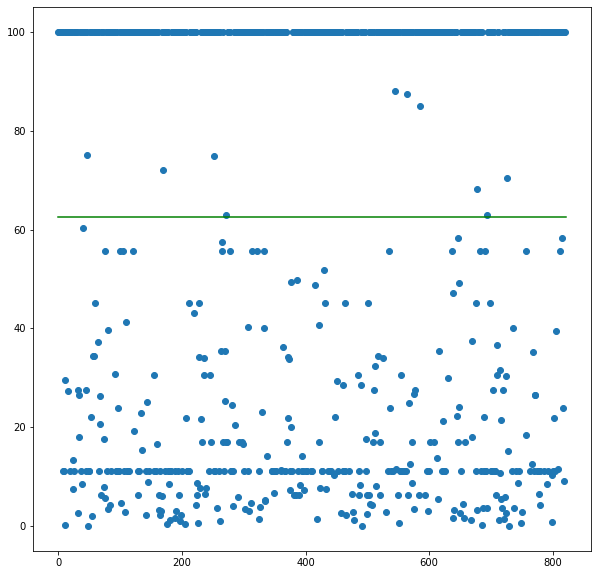

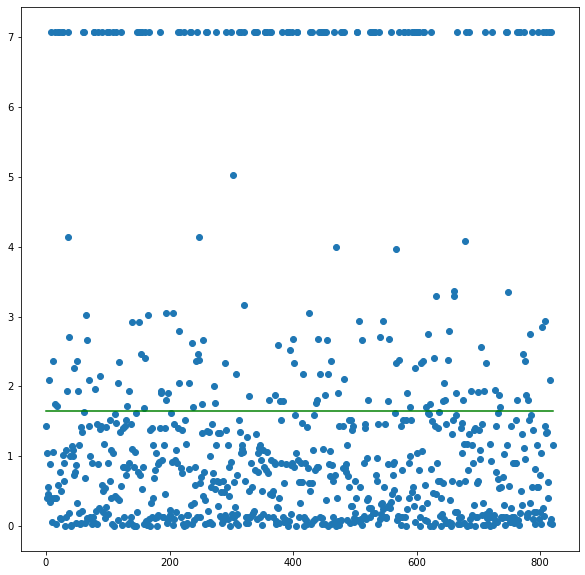

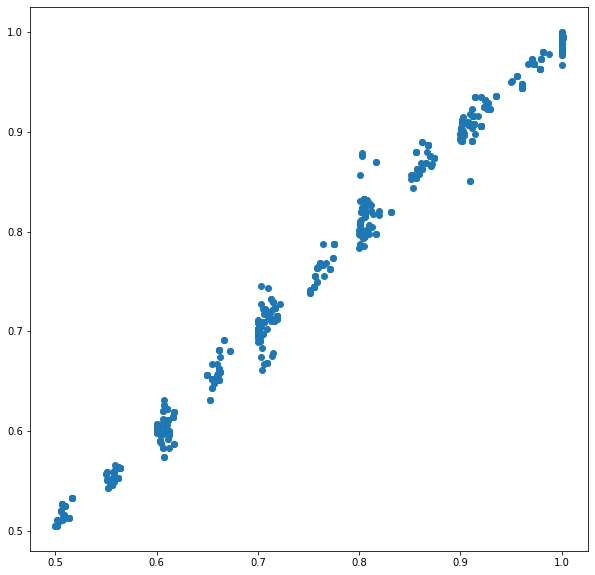

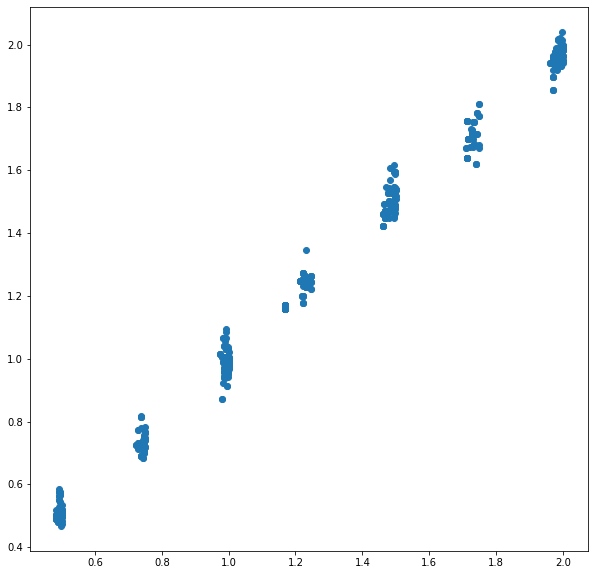

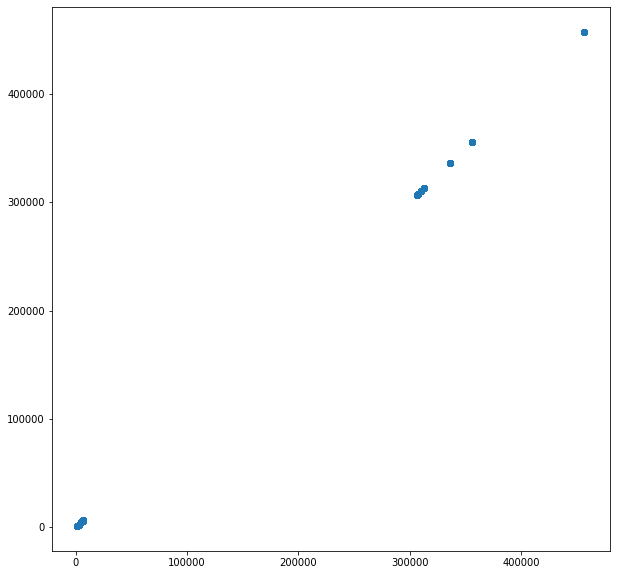

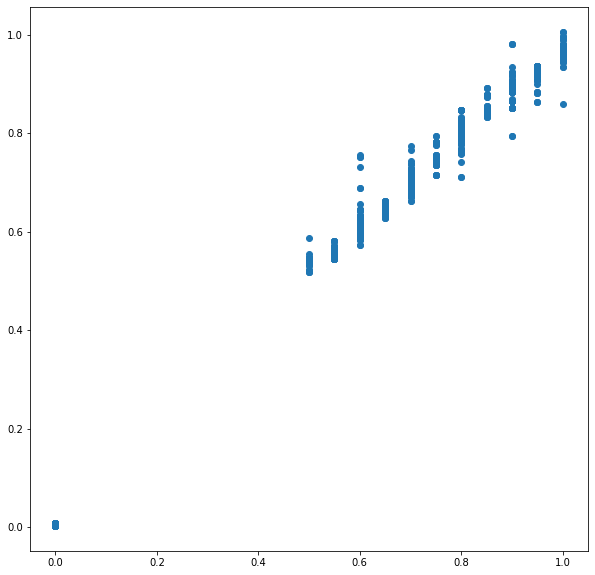

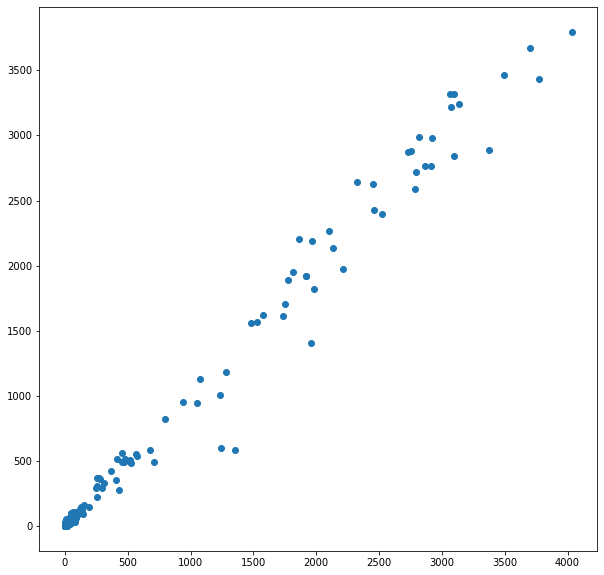

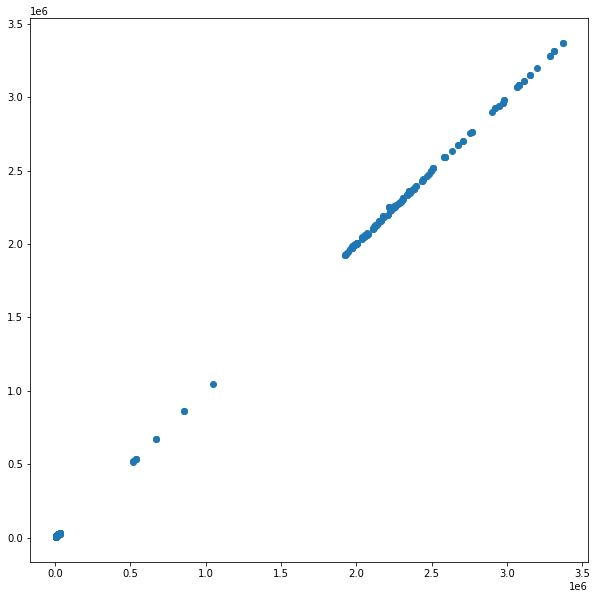

In [ ]:
#MultiOutput Regressor using GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.tree import DecisionTreeRegressor

#knearest neighbour
from sklearn.neighbors import KNeighborsRegressor
# linear regression for multioutput regression
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import seaborn as sn
import matplotlib.pyplot as plt
import pandas
from sklearn.svm import LinearSVR
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR
import xlwt 
from xlwt import Workbook 

def drawCurve(x,y):
  plt.figure(figsize=(10,10))
  plt.scatter(x,y) 
  plt.plot([0,len(y)],[np.mean(y),np.mean(y)],color = 'g')
  #plt.plot(x,y,marker ='o') # for changing it to scatter plt.scatter() and keep the s which is point size
  
  #plt.savefig('coreUvsDrc.pdf', bbox_inches = 'tight')

def drawRocCurve(x,y):
  plt.figure(figsize=(10,10))
  plt.scatter(x,y) 




dataframe = pandas.read_excel('/content/datasetOrginal.xlsx')


asr = dataframe['aspectratio'].tolist()
tArea = dataframe['totalarea'].tolist()
tWlen = dataframe['twirelen'].tolist()
cLkp = dataframe['clkperiod'].tolist()
drc = dataframe['drc'].tolist()
coreU = dataframe['coreutil'].tolist()


yOut = []
for i in range(len(asr)):
  yOut.append([coreU[i],asr[i],tArea[i],cLkp[i],drc[i],tWlen[i]])

df = dataframe.drop('aspectratio', axis=1)
df = df.drop('totalarea', axis=1)
df = df.drop('twirelen', axis=1)
df = df.drop('clkperiod', axis=1)
df = df.drop('drc', axis=1)
df = df.drop('coreutil', axis=1)

X = df.values
xTrain = []
xTest = []
yTrain = []
yTest = []

xTrain, xTest, yTrain, yTest = train_test_split(X, yOut, test_size=0.30, random_state=1)





yHat = MultiOutputRegressor(GradientBoostingRegressor(random_state=1)).fit(xTrain, yTrain).predict(xTest)


errorArray = np.zeros([6,len(yHat)])

for i in range(6):
  sum1,sum2 = 0,0
  for j in range(len(yHat)):
    predOne = np.array(yHat).T[i][j]
    actualOne = np.array(yTest).T[i][j]
    
    if predOne == actualOne:
      errorArray[i][j] = 0
    
    else:
      sum1 = np.abs(np.abs(predOne)-actualOne)
      sum2 = (actualOne+ np.abs(predOne))
      sum = sum1/sum2
      errorArray[i][j] = sum*100

 
print(errorArray)
print('overall')
#print(np.mean(accuracy))
#[coreU[i],asr[i],tArea[i],cLkp[i],drc[i],tWlen[i]]
sampleNo = [i for i in range(len(yHat))]
for i in range(6):
  drawCurve(sampleNo,list(errorArray[i]))


for i in range(6):
  print(np.mean(list(errorArray[i])))



plot_yHat = yHat.T
plot_yTest = np.array(yTest).T

for i in range(6):
  drawRocCurve(plot_yTest[i],plot_yHat[i])

#Error percentage]]
# r=0
# wb = Workbook() 
# sheet1 = wb.add_sheet('Sheet') 
# sheet1.write(r,0,'% error coreu')
# sheet1.write(r, 1, '% error asr') 
# sheet1.write(r, 2, '% error area') 
# sheet1.write(r, 3, '% error clkp') 
# sheet1.write(r, 4, '% error drc') 
# sheet1.write(r, 5, '%error twlen') 

# r+=1
# for i in range(len(yHat)):

#   for j in range(6):

#     predOne = yHat[i][j]
#     actualOne = yTest[i][j]

#     if predOne > actualOne:
#       cal = ((predOne - actualOne)/predOne)*100
#     else:
#       cal = ((-predOne + actualOne)/actualOne)*100
#     sheet1.write(r,j,cal)
#   r+=1


# wb.save('accuracy.xls') 
  






74
[[9.77094261e+01 9.85776011e+01 9.61399248e+01 ... 9.94380191e+01
  9.99803514e+01 9.87927109e+01]
 [9.12722735e+01 9.71063261e+01 8.81502745e+01 ... 9.92779305e+01
  9.99005718e+01 9.46508522e+01]
 [3.30432087e+00 5.12239130e+00 6.78374696e-01 ... 7.20334211e+00
  1.25905447e+00 5.34687917e+00]
 [8.90108656e+01 9.90052277e+01 8.70133946e+01 ... 9.71116625e+01
  9.99408593e+01 9.92048104e+01]
 [1.00000000e+02 1.00000000e+02 1.00000000e+02 ... 1.00000000e+02
  9.11782020e+01 1.00000000e+02]
 [1.35291015e+00 1.25605718e+00 2.48440277e-01 ... 4.52024109e-01
  9.03525910e-02 2.29860589e-02]]
overall
95.01840691674838
94.86920257522539
1.8433273258426919
96.28712713026405
84.06410072694266
0.5644712395473623


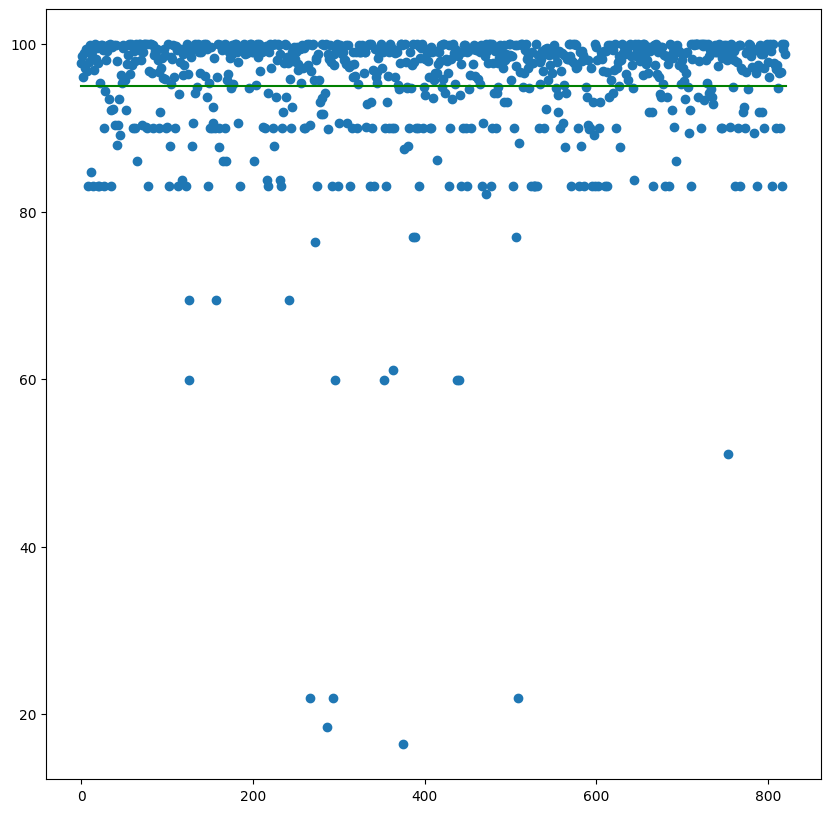

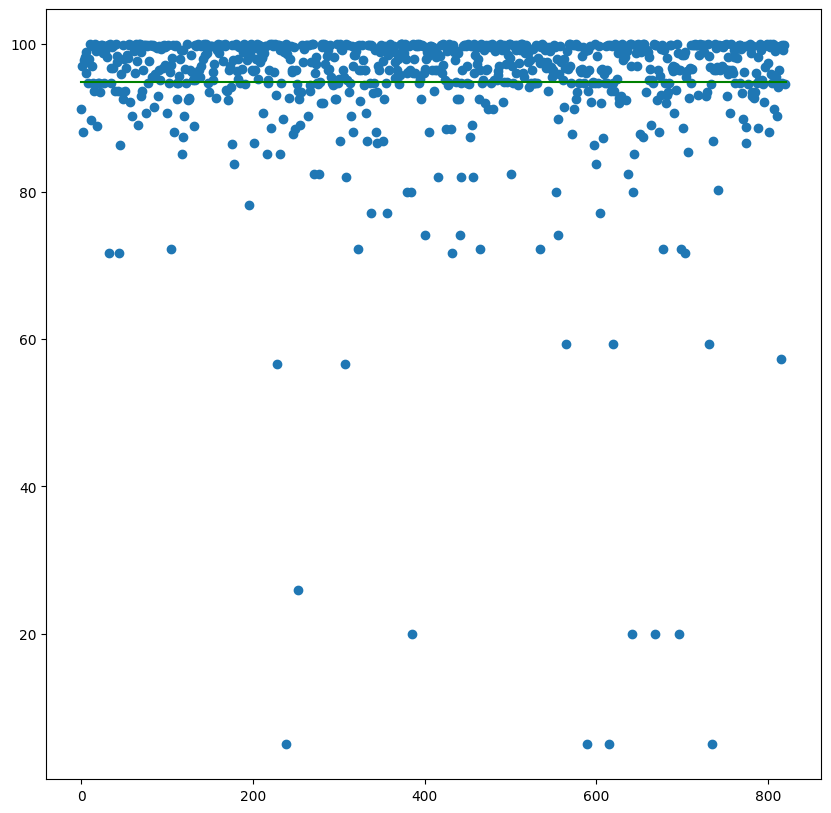

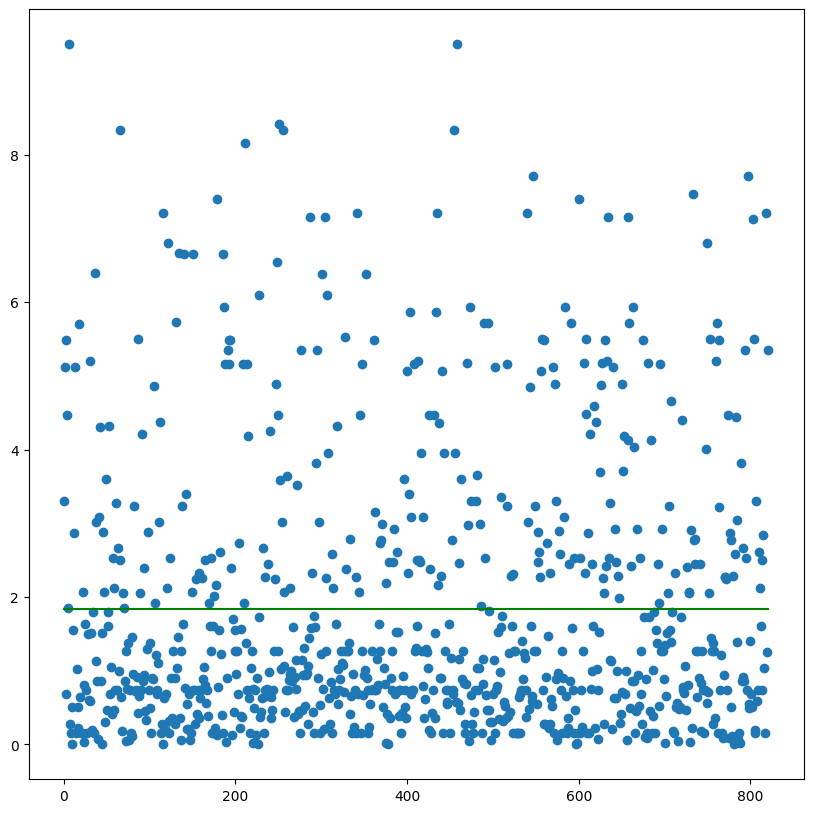

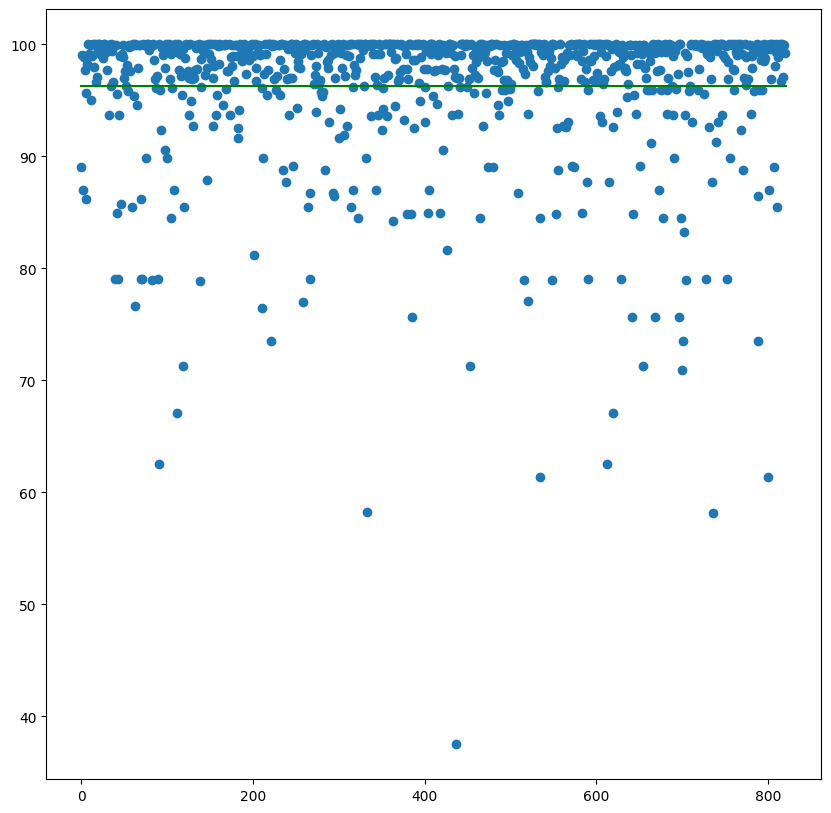

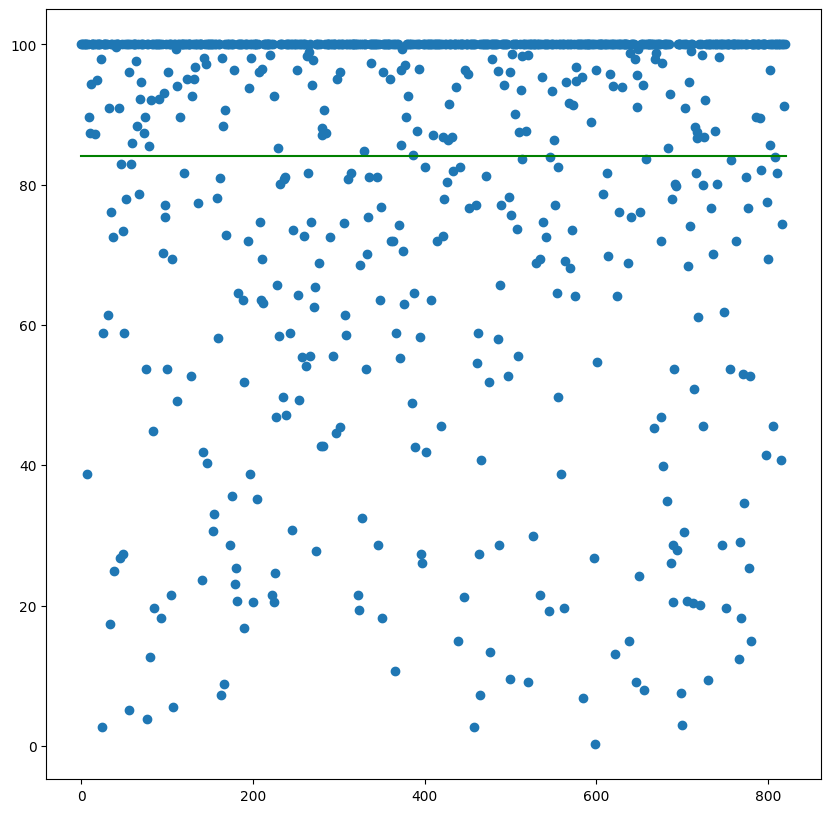

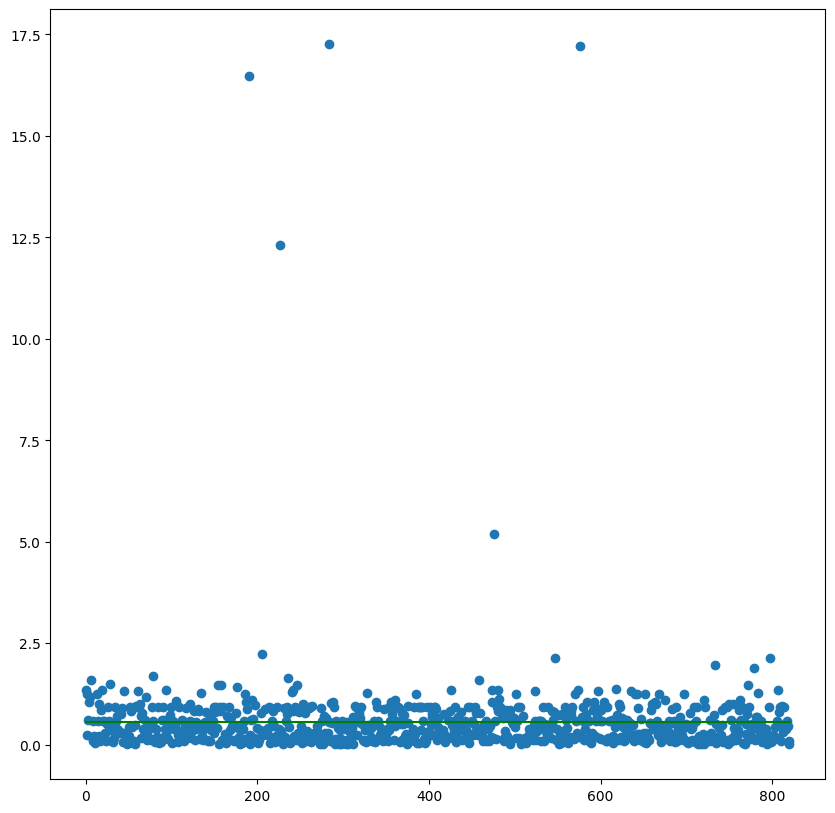

In [ ]:
#Neural

from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle

from keras.models import Sequential
from keras.layers import Dense



from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.tree import DecisionTreeRegressor

#knearest neighbour
from sklearn.neighbors import KNeighborsRegressor
# linear regression for multioutput regression
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import seaborn as sn
import matplotlib.pyplot as plt
import pandas
from sklearn.svm import LinearSVR
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR


def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(n_outputs, kernel_initializer='he_uniform'))
	model.compile(loss='mae', optimizer='adam')
	return model

def drawCurve(x,y):
  plt.figure(figsize=(10,10))
  plt.scatter(x,y) 
  plt.plot([0,len(y)],[np.mean(y),np.mean(y)],color = 'g')
  #plt.plot(x,y,marker ='o') # for changing it to scatter plt.scatter() and keep the s which is point size
  
  #plt.savefig('coreUvsDrc.pdf', bbox_inches = 'tight')


dataframe = pandas.read_excel('/content/datasetOrginal.xlsx')


asr = dataframe['aspectratio'].tolist()
tArea = dataframe['totalarea'].tolist()
tWlen = dataframe['twirelen'].tolist()
cLkp = dataframe['clkperiod'].tolist()
drc = dataframe['drc'].tolist()
coreU = dataframe['coreutil'].tolist()


yOut = []
for i in range(len(asr)):
  yOut.append([coreU[i],asr[i],tArea[i],cLkp[i],drc[i],tWlen[i]])

df = dataframe.drop('aspectratio', axis=1)
df = df.drop('totalarea', axis=1)
df = df.drop('twirelen', axis=1)
df = df.drop('clkperiod', axis=1)
df = df.drop('drc', axis=1)
df = df.drop('coreutil', axis=1)

X = df.values
xTrain = []
xTest = []
yTrain = []
yTest = []

xTrain, xTest, yTrain, yTest = train_test_split(X, yOut, test_size=0.30, random_state=1)

print(len(xTrain[0]))

n_inputs, n_outputs = 74, 6
# get model
model = get_model(n_inputs, n_outputs)
# fit the model on all data
xTrain = xTrain.astype(float)
yTrain = np.array(yTrain).astype(float)


model.fit(xTrain, yTrain, verbose=0, epochs=100)

xTest = xTest.astype(float)
yHat = model.predict(xTest)


errorArray = np.zeros([6,len(yHat)])

for i in range(6):
  sum1,sum2 = 0,0
  for j in range(0,len(yHat)):
    predOne = np.array(yHat).T[i][j]
    actualOne = np.array(yTest).T[i][j]
    
    if predOne == actualOne:
      errorArray[i][j] = 0
    
    else:
      sum1 = np.abs(np.abs(predOne)-actualOne)
      sum2 = (actualOne+ np.abs(predOne))
      sum = sum1/sum2
      errorArray[i][j] = sum*100

 
print(errorArray)
print('overall')
#print(np.mean(accuracy))
#[coreU[i],asr[i],tArea[i],cLkp[i],drc[i],tWlen[i]]
sampleNo = [i for i in range(len(yHat))]
for i in range(6):
  drawCurve(sampleNo,list(errorArray[i]))


for i in range(6):
  print(np.mean(list(errorArray[i])))


#Drawing six curve
# for i in range(6):
#   drawCurve(list(plot_yTest[i]),list(plot_yHat[i]))


#Error percentage

# for i in range(len(yHat)):
#   output = ""
#   for j in range(6):
#     calculation = ((yHat[i][j]-yTest[i][j])/yTest[i][j])*100
#     output += str("{:.2f}".format(calculation))+"  "
  
#   print(output)






In [ ]:
import numpy as np

xTest = [1,2,3,6,0,1,5,6,0,8]
xPred = [1,2,3,6,8,1,5,6,5,8]
sum1,sum2=0,0
for i in range(10):
  sum1+= np.abs(xTest[i]-xPred[i])
  sum2+= (xTest[i]+xPred[i])
  print(np.abs(xTest[i]-xPred[i])/(xTest[i]+xPred[i]))


print(sum1*100/sum2)

0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
16.883116883116884


In [ ]:
import plotly.io as pio
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

# import plotly.io as pio
#x, y = (list(x) for x in zip(*sorted(zip(rnd_clf.feature_importances_, dataset_with_num.iloc[:,0:13].columns),
#reverse = False)))
x, y = (list(x) for x in zip(*sorted(zip(rnd_reg.feature_importances_, dataset_with_num.iloc[:,0:13].columns),
reverse = False)))
trace2 = go.Bar(
x=y ,
y=x,
marker=dict(
color=x,
colorscale = 'Viridis',
reversescale = True
),
name='Random Forest Feature importance',
orientation='v',
)

layout = dict(
#title='Barplot of Feature importances',
width = 550, height = 350,
yaxis=dict(
showgrid=True,
showline=False,
showticklabels=True,
#margin={'l': 0, 'r': 0, 't': 20, 'b': 0}
# domain=[0, 0.85],
),
margin=dict(
l=50, b=95, t=20, r=100,
),
)
plt.tight_layout()
#layout = go.Layout( autosize=True, **margin={'l': 0, 'r': 0, 't': 20, 'b': 0}**)
fig1 = go.Figure(data=[trace2], layout=layout)
iplot(fig1)
#pio.write_image(fig1, 'feat_imp_rf_clf.svg')
#pio.write_image(fig1, 'feat_imp_rf_clf.pdf')
pio.write_image(fig1, 'feat_imp_rf_reg.svg')
pio.write_image(fig1, 'feat_imp_rf_reg.pdf')